## Author : Sriram Ananthula

The objective of this assignment is to demonstrate the working of Decision Tree Classification algorithm in Machine Learning using pre-built python library sklearn on the famous Iris Dataset.

### Importing the required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree

### Importing and visualizing the Data set

In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['Class'] = iris.target

# Decoding the classes to actual species names
df['Species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class,Species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


Bivariant plot is the best way to analyze the coorelation between different combinations of input variables. It can be seen from the below plots that the petal width is the important feature in distinguishing the classes well

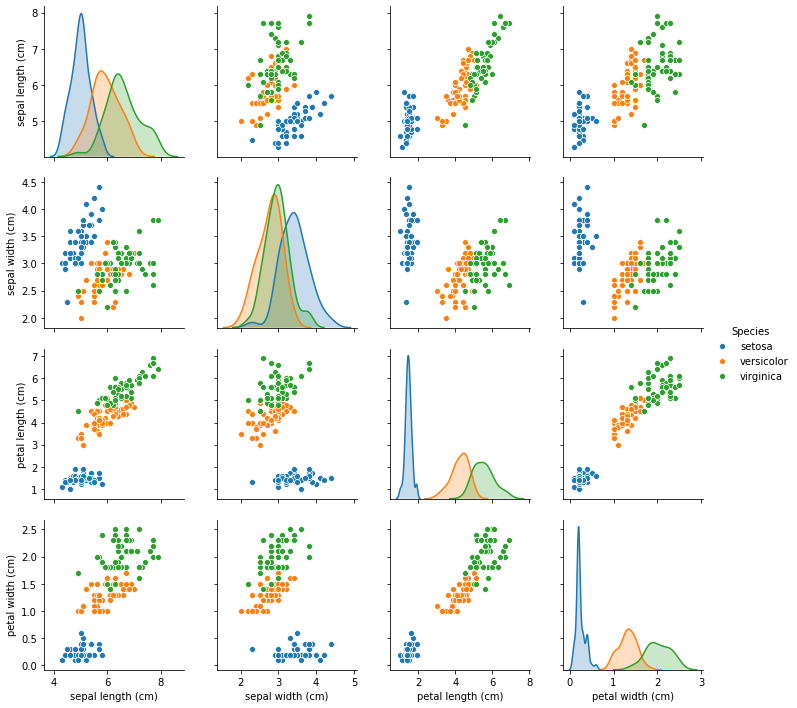

In [3]:
sns.pairplot(df.drop(['Class'], axis = 1), hue="Species")
plt.show()

### Model Building

In [4]:
X = df.drop(['Class', 'Species'], axis = 1)
y = df['Species']

# 80% of the data points are used to train the model and 20% is used as test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [5]:
DT = DecisionTreeClassifier()
model = DT.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [6]:
final_df = df.copy(deep = 'True')
final_df['Predicted_Class'] = model.predict(X)
final_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class,Species,Predicted_Class
0,5.1,3.5,1.4,0.2,0,setosa,setosa
1,4.9,3.0,1.4,0.2,0,setosa,setosa
2,4.7,3.2,1.3,0.2,0,setosa,setosa
3,4.6,3.1,1.5,0.2,0,setosa,setosa
4,5.0,3.6,1.4,0.2,0,setosa,setosa


### Model Evaluation

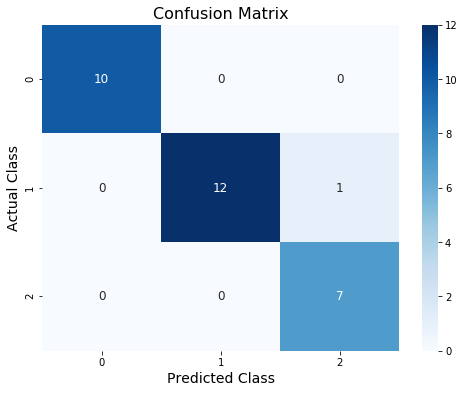

In [7]:
plt.figure(figsize=(8,6))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt = 'd',annot_kws={"size":12})

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.title('Confusion Matrix', fontsize = 16)
plt.xlabel('Predicted Class', fontsize = 14)
plt.ylabel('Actual Class', fontsize = 14)
plt.show()

Unlike regression models, classification models are evaluated based on the confusion matrix. Accuracy is defined as the ratio of correct predictions to the total predictions made. Other metrics like precision, recall and F1 score along with the accuracy are reported below

In [8]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.92      0.96        13
   virginica       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



The Classifier trained on 80% of the data can be seen below. If a new sample whose class has to be predicted follows a particular path, the classifier can predict its class based on the training knowledge 

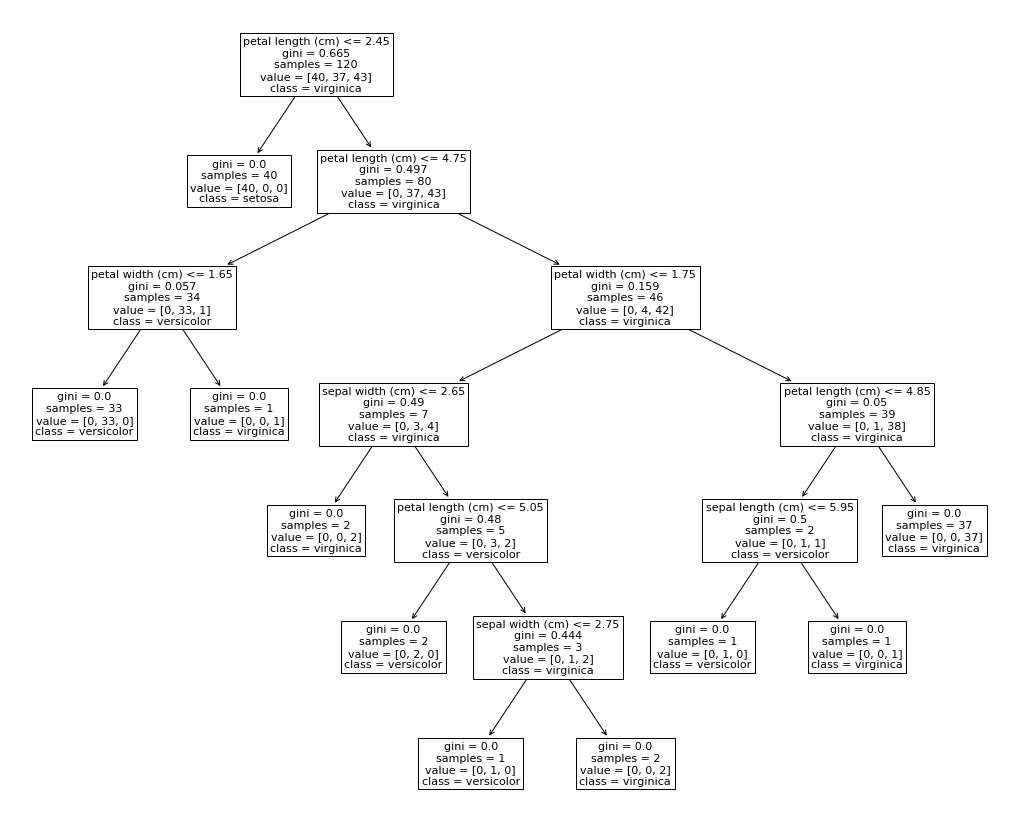

In [9]:
plt.figure(figsize=(18,15))
tree.plot_tree(model, feature_names = iris.feature_names, class_names = df['Species'].unique())
plt.show()

### Limitations
Below is the tree trained on 100% of the data. It can be clearly seen that a small change in the training data can completely change the structure of the tree, which concludes that the Decision Trees are highly sensitive. Hence various techniques like bagging and boosting are used to average out the variance by combining multile trees.

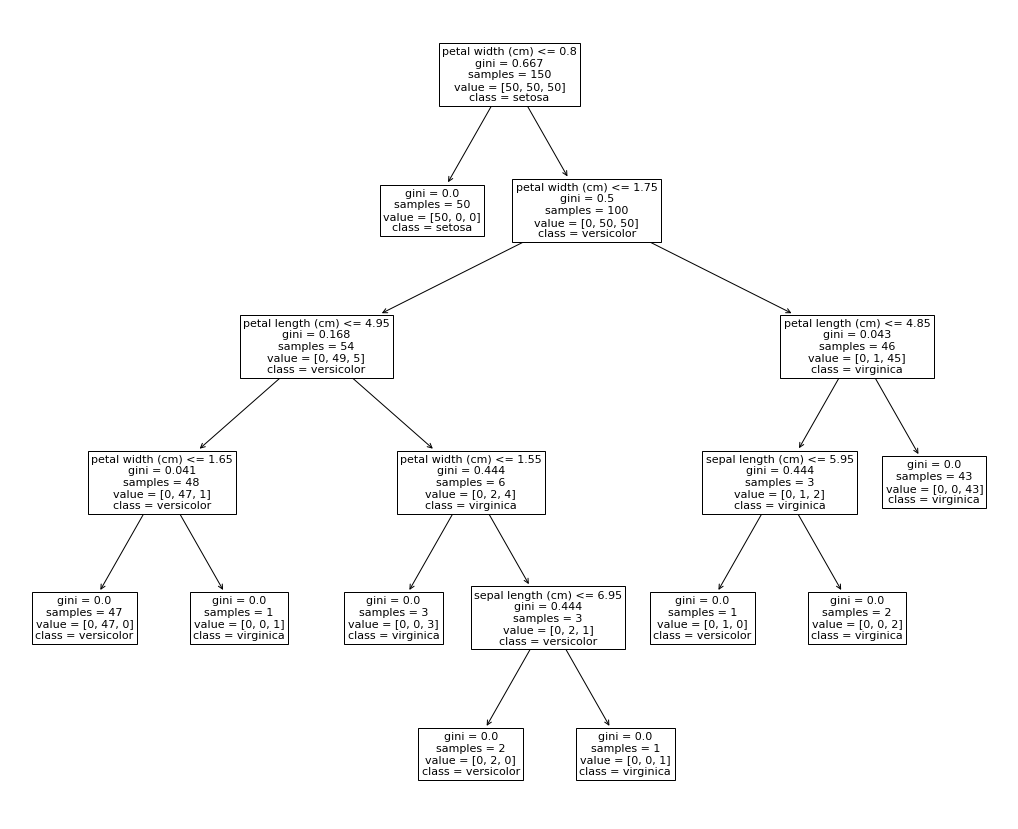

In [10]:
DT1 = DecisionTreeClassifier()
model_full = DT1.fit(X, y)
plt.figure(figsize=(18,15))
tree.plot_tree(model_full, feature_names = iris.feature_names, class_names = df['Species'].unique())
plt.show()